# **WORK ON THIS UNTIL YOU COULD SUMMERIZE AS  SENTENCES OR PSEUDO CODE THEN WRITE THE CODE WITHOUT LOOKING AT IT.**

# **`MAKEMORE PART1 TURKISH`**

### **`LOAD TURKISH DATA AND FILTER FOR ONLY NAMES(NO GENDER)`:**

In [3]:
import unicodedata

with open('turkce_isim.csv', 'r' ) as f:
    data = f.read().splitlines()  
names = [i.split(',')[0]for i in data[1:]]
chs_set = set()

for name in names:
    for ch in list(name):
        chs_set.add(ch)       
print(sorted(list(chs_set)),len(sorted(list(chs_set))))   

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'ç', 'ö', 'ü', 'ğ', 'ı', 'ş'] 31


### **`SORT FOR TURKISH ALPHABET-(THIS IS READY BELOW)`:**

In [4]:
turkish_sort = ['a', 'b', 'c', 'ç', 'd', 'e', 'f', 'g', 'ğ', 'h', 'ı', 'i', 'j', 'k', 'l', 'm', 'n', 'o','ö', 'p', 'r', 's', 'ş', 't', 'u','ü', 'v', 'w', 'x', 'y', 'z']
turkish_sort.insert(0,'.')
turkish_sort,len(turkish_sort)

(['.',
  'a',
  'b',
  'c',
  'ç',
  'd',
  'e',
  'f',
  'g',
  'ğ',
  'h',
  'ı',
  'i',
  'j',
  'k',
  'l',
  'm',
  'n',
  'o',
  'ö',
  'p',
  'r',
  's',
  'ş',
  't',
  'u',
  'ü',
  'v',
  'w',
  'x',
  'y',
  'z'],
 32)

### **`CREATE A STRING TO INTEGER(stoi) DICTIONARY FROM 'turkish_sort' list `:**

In [5]:
stoi = {ch:i for i,ch in enumerate(turkish_sort)}
stoi

{'.': 0,
 'a': 1,
 'b': 2,
 'c': 3,
 'ç': 4,
 'd': 5,
 'e': 6,
 'f': 7,
 'g': 8,
 'ğ': 9,
 'h': 10,
 'ı': 11,
 'i': 12,
 'j': 13,
 'k': 14,
 'l': 15,
 'm': 16,
 'n': 17,
 'o': 18,
 'ö': 19,
 'p': 20,
 'r': 21,
 's': 22,
 'ş': 23,
 't': 24,
 'u': 25,
 'ü': 26,
 'v': 27,
 'w': 28,
 'x': 29,
 'y': 30,
 'z': 31}

### **`CREATE A INTEGER TO STRING(itos) DICTIONARY FROM 'stoi' list `:**

In [6]:
itos = {i: st for st, i in stoi.items()}
itos

{0: '.',
 1: 'a',
 2: 'b',
 3: 'c',
 4: 'ç',
 5: 'd',
 6: 'e',
 7: 'f',
 8: 'g',
 9: 'ğ',
 10: 'h',
 11: 'ı',
 12: 'i',
 13: 'j',
 14: 'k',
 15: 'l',
 16: 'm',
 17: 'n',
 18: 'o',
 19: 'ö',
 20: 'p',
 21: 'r',
 22: 's',
 23: 'ş',
 24: 't',
 25: 'u',
 26: 'ü',
 27: 'v',
 28: 'w',
 29: 'x',
 30: 'y',
 31: 'z'}

### **`CREATE A N MATRIX FOR 32 CHRS`:**
- **`N HOLDS NUMBERS OF BIGRAMS IN THE NAMES IN THE DATA.`**
- **`NO ITEM IN THE N MATRIX SHOULD BE ZERO.(TELL WHY)`**

In [7]:
import torch
N = torch.zeros((32, 32), dtype=torch.int32)

for chs in names:
    chs = '.'+ chs +'.'
    for i in zip(chs,chs[1:]):
        ix=stoi[i[0]]
        iy=stoi[i[1]]
        N[ix,iy] += 1

### **`PLOT THE MATRIX`:**

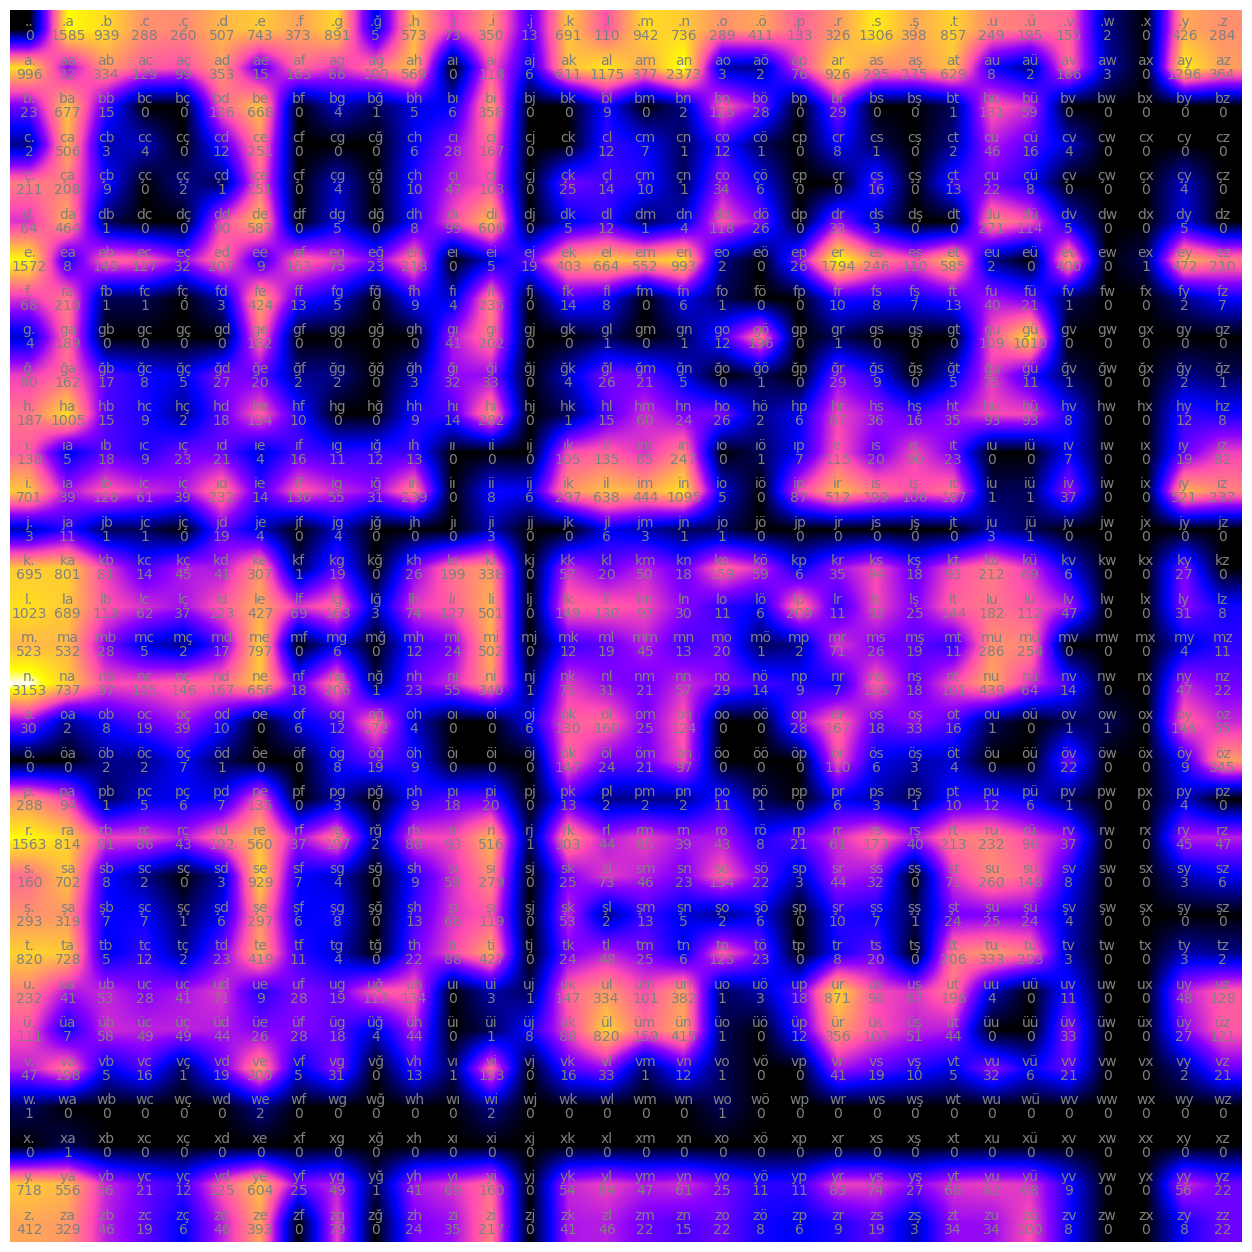

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(torch.log(N+1), cmap='gnuplot2', interpolation='bilinear')
for i in range(32):
    for j in range(32):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

### **`What does multinomial distribution do?(use with this generator seed 2147483647)`**
**`pluck out one line of the matrix and mormalize it despite this:`**

`While I was trying to understand the multinomial distribution, I realized that there is no need to normalize the distribution. The multinomial distribution is already normalized. If the sum of the probabilities is not 1, then torch.multinomial use floats as weights and the result will be the same.`



In [9]:
P= N[0].float()
P

tensor([   0., 1585.,  939.,  288.,  260.,  507.,  743.,  373.,  891.,    5.,
         573.,   73.,  350.,   13.,  691.,  110.,  942.,  736.,  289.,  411.,
         133.,  326., 1306.,  398.,  857.,  249.,  195.,  155.,    2.,    0.,
         426.,  284.])

In [10]:
# beware it only works for the first row. if yo want to normalize the whole matrix, you need to to use the dim=1 parameter and need to keepdims=True
Normalized =  P/P.sum()
Normalized

tensor([0.0000, 0.1123, 0.0665, 0.0204, 0.0184, 0.0359, 0.0527, 0.0264, 0.0631,
        0.0004, 0.0406, 0.0052, 0.0248, 0.0009, 0.0490, 0.0078, 0.0668, 0.0522,
        0.0205, 0.0291, 0.0094, 0.0231, 0.0926, 0.0282, 0.0607, 0.0176, 0.0138,
        0.0110, 0.0001, 0.0000, 0.0302, 0.0201])

In [11]:
g = torch.Generator().manual_seed(2147483647)
torch.multinomial(Normalized,10,generator=g)

tensor([10, 22,  1,  2, 12, 21, 16,  3,  4,  8])

In [12]:
g = torch.Generator().manual_seed(2147483647)
torch.multinomial(P,10,generator=g)

tensor([10, 22,  1,  2, 12, 21, 16,  3,  4,  8])

### **`HOW DOES torch.sum works in a matrix:`**
`What are the dimensions?` ([torch.sum link:](https://pytorch.org/docs/stable/generated/torch.sum.html))

`Explore the torch.sum with dimensons over torch.arange(4 * 5 * 6).view(4, 5, 6) matrix.`

`Normalize the matrix along the rows: the normalized matrix (P) should represent the probability of bigrams in the`**`names`**



In [13]:
b = torch.arange(4 * 5 * 6).view(4, 5, 6)
b

tensor([[[  0,   1,   2,   3,   4,   5],
         [  6,   7,   8,   9,  10,  11],
         [ 12,  13,  14,  15,  16,  17],
         [ 18,  19,  20,  21,  22,  23],
         [ 24,  25,  26,  27,  28,  29]],

        [[ 30,  31,  32,  33,  34,  35],
         [ 36,  37,  38,  39,  40,  41],
         [ 42,  43,  44,  45,  46,  47],
         [ 48,  49,  50,  51,  52,  53],
         [ 54,  55,  56,  57,  58,  59]],

        [[ 60,  61,  62,  63,  64,  65],
         [ 66,  67,  68,  69,  70,  71],
         [ 72,  73,  74,  75,  76,  77],
         [ 78,  79,  80,  81,  82,  83],
         [ 84,  85,  86,  87,  88,  89]],

        [[ 90,  91,  92,  93,  94,  95],
         [ 96,  97,  98,  99, 100, 101],
         [102, 103, 104, 105, 106, 107],
         [108, 109, 110, 111, 112, 113],
         [114, 115, 116, 117, 118, 119]]])

In [14]:
#got it
#the result is (1, 5, 6) tensor. it is the sum of the 1st(dim=0) dimension of the input tensor
b = torch.arange(4 * 5 * 6).view(4, 5, 6)
torch.sum(b,0,keepdim=True)




tensor([[[180, 184, 188, 192, 196, 200],
         [204, 208, 212, 216, 220, 224],
         [228, 232, 236, 240, 244, 248],
         [252, 256, 260, 264, 268, 272],
         [276, 280, 284, 288, 292, 296]]])

In [15]:
#got it
#the result is (4, 1, 6) tensor. Because we sum the second(dim=1) dimension.
torch.sum(b,1,keepdim=True)

tensor([[[ 60,  65,  70,  75,  80,  85]],

        [[210, 215, 220, 225, 230, 235]],

        [[360, 365, 370, 375, 380, 385]],

        [[510, 515, 520, 525, 530, 535]]])

In [16]:
#got it
#the result is (4, 5, 1) tensor. Because we sum the third(dim=2) dimension. 
torch.sum(b,2,keepdim=True)

tensor([[[ 15],
         [ 51],
         [ 87],
         [123],
         [159]],

        [[195],
         [231],
         [267],
         [303],
         [339]],

        [[375],
         [411],
         [447],
         [483],
         [519]],

        [[555],
         [591],
         [627],
         [663],
         [699]]])

In [17]:
N.add_(1)# this is for smoothing
P = N / N.sum(1,keepdim=True)
P[0]

tensor([7.0711e-05, 1.1215e-01, 6.6469e-02, 2.0436e-02, 1.8456e-02, 3.5921e-02,
        5.2609e-02, 2.6446e-02, 6.3075e-02, 4.2427e-04, 4.0588e-02, 5.2326e-03,
        2.4820e-02, 9.8996e-04, 4.8932e-02, 7.8490e-03, 6.6681e-02, 5.2114e-02,
        2.0506e-02, 2.9133e-02, 9.4753e-03, 2.3123e-02, 9.2420e-02, 2.8214e-02,
        6.0670e-02, 1.7678e-02, 1.3859e-02, 1.1031e-02, 2.1213e-04, 7.0711e-05,
        3.0194e-02, 2.0153e-02])

### **`Sample 10 names the normalized matrix (P)`** 

In [18]:
#first sample from the N as you start with the first character(.) which is 0 

for i in range(10):
    synt_name = [] 
    ix = 0
    while True:
        p = torch.multinomial(P[ix],1)        
        synt_name.append(itos[p.item()])
        ix = p.item()
        if ix == 0:
            print(''.join(synt_name))
            break
    
    
    

keh.
özür.
man.
efilvene.
cin.
ga.
ganiy.
r.
sen.
orevini.


Genders and meanings are assigned by the external model.
- Gülelkahi (Female): Gülelkahi, eski zamanlarda kullanılan bir neşe büyüsüdür.
- Çirgül (Female): Çirgül, bir tür hızlı ve neşeli dansın adıdır.
- Tigetoran (Male): Tigetoran, mitolojide geçen efsanevi bir yaratığın adıdır.
- Emerin (Female): Emerin, antik bir dilde "ışık saçan" anlamına gelir.
- Avzin (Male): Avzin, geleneksel bir av töreninin adıdır.
- Setulağmen (Male): Setulağmen, bir tür eski ve nadir bulunan taşın adıdır.
- Günbedin (Male): Günbedin, güneşin doğuşunu kutlamak için düzenlenen bir festivalin adıdır.
- Sülsan (Female): Sülsan, bir tür egzotik çiçeğin adıdır.
- Bihasel (Female): Bihasel, bir tür eski ve gizemli yazının adıdır.
- Kınkan (Male): Kınkan, bir tür geleneksel müzik aletinin adıdır.
- Cizüne (Female): Cizüne, bir tür eski ve nadir bulunan kuşun adıdır.
- Imensar (Male): Imensar, bir tür eski ve gizemli taşın adıdır.
- Kayratura (Male): Kayratura, bir tür geleneksel halk dansının adıdır.

### **`Print the probabilities of the first three names`** 
**`to make a good model probabilities should be max, because these names are in the list, they are real names`**

**`Write them side by side: bigram, its prob, its log prob(only the first three names)`**

**`log prob is for convenience, because product of probabilities would be hard to calculate cosidering the small numbers`**

In [23]:
for chs in names:
    chs = '.'+ chs +'.'
    for i in zip(chs,chs[1:]):
        ix=stoi[i[0]]
        iy=stoi[i[1]]
        print(f'{i[0]}{i[1]} prob:{P[ix,iy].item():5f}   log prob:{P[ix,iy].log().item():5f}')
# How to get the log of a whole tensor
P
#  
pmult = P
#total log probability
p_mult = P.view(-1).log().sum()
print(f' total total log probability:{p_mult}')
# average log probability
p_ave = P.view(-1).log().sum()/P.numel()
print(f' average log probability:{p_ave}')   
P.numel()           

.a prob:0.112148   log prob:-2.187934
ab prob:0.028674   log prob:-3.551759
ba prob:0.293634   log prob:-1.225423
a. prob:0.085338   log prob:-2.461139
.a prob:0.112148   log prob:-2.187934
ab prob:0.028674   log prob:-3.551759
ba prob:0.293634   log prob:-1.225423
ac prob:0.011127   log prob:-4.498356
ca prob:0.452275   log prob:-0.793465
a. prob:0.085338   log prob:-2.461139
.a prob:0.112148   log prob:-2.187934
ab prob:0.028674   log prob:-3.551759
ba prob:0.293634   log prob:-1.225423
ac prob:0.011127   log prob:-4.498356
ca prob:0.452275   log prob:-0.793465
an prob:0.203201   log prob:-1.593559
n. prob:0.462463   log prob:-0.771188
.a prob:0.112148   log prob:-2.187934
ab prob:0.028674   log prob:-3.551759
ba prob:0.293634   log prob:-1.225423
aç prob:0.008559   log prob:-4.760720
ç. prob:0.227712   log prob:-1.479673
.a prob:0.112148   log prob:-2.187934
ab prob:0.028674   log prob:-3.551759
ba prob:0.293634   log prob:-1.225423
ay prob:0.111016   log prob:-2.198081
y. prob:0.22

1024

- update the code below ro calculate not only total probability but also the probability of each bigram.
- and not only the log of the total probability but average log probability of the whole sequence. 

- create a 32 neurons for 32 characters that could handle different number of inputs(bigrams in a name and the output is the probability of the next character.

around 1:20:40 Andrej says the output of the network are log counts end first; he expotentiate the output to then get the probabilities. Learn that.
around 1:41:00 he shows the grad of W so check that part again.I did not understand the h value. It added an h value (I assume it is for making it more positive) than said that it increases the loss.   